In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('user_profiles_for_ads.csv')
# Q.1: Import data and check null values, column info, and descriptive statistics of the data.
print(df.isnull().sum())
print("________________________________________________________________________________________________________________________________________________")
print(df.info())
print("________________________________________________________________________________________________________________________________________________")
print(df.describe())
print("________________________________________________________________________________________________________________________________________________")

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64
________________________________________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID        

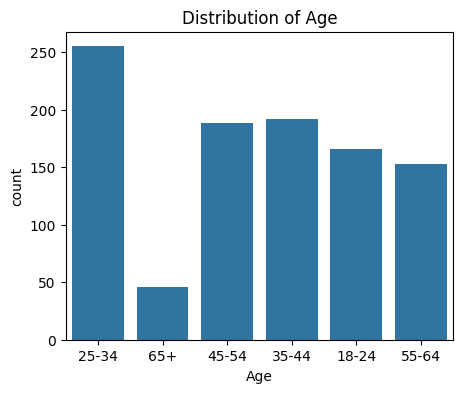

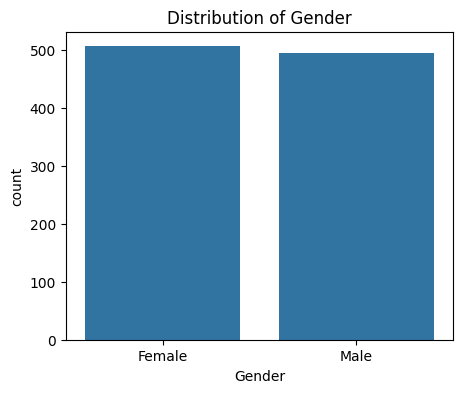

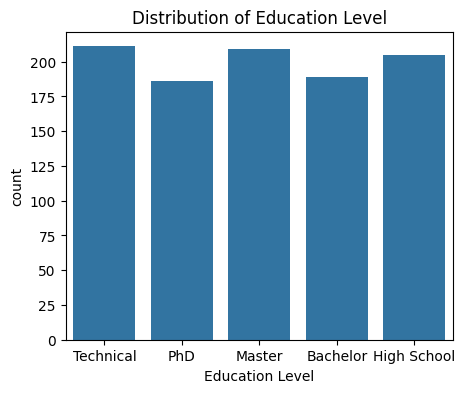

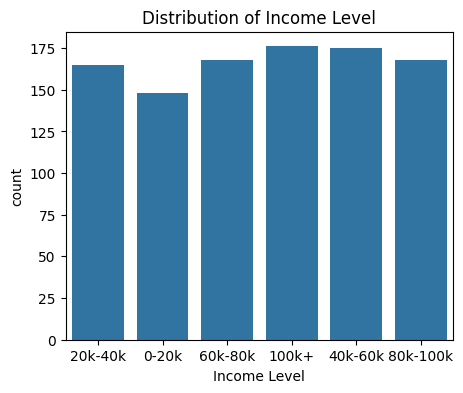

In [5]:
# Q.2: Visualize the distribution of key demographic variables
#age
plt.figure(figsize=(5,4))
sns.countplot(x='Age', data=df)
plt.title('Distribution of Age')
plt.show()
# gender
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()
#education level
plt.figure(figsize=(5,4))
sns.countplot(x='Education Level', data=df)
plt.title('Distribution of Education Level')
plt.show()
#income level
plt.figure(figsize=(5,4))
sns.countplot(x='Income Level', data=df)
plt.title('Distribution of Income Level')
plt.show()


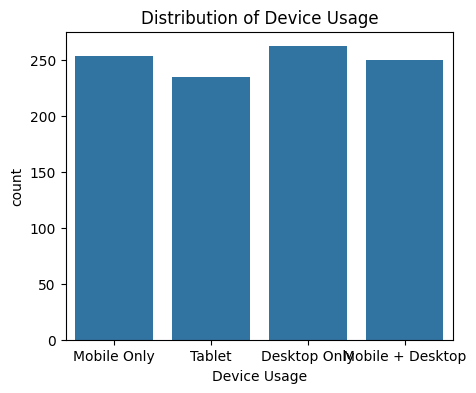

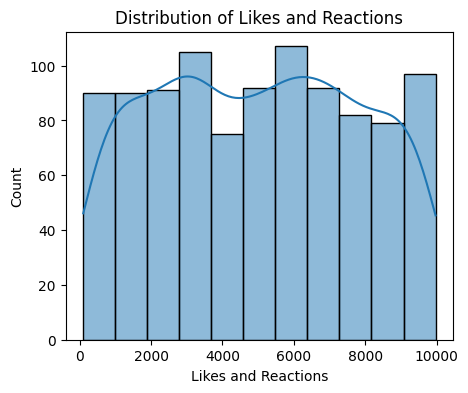

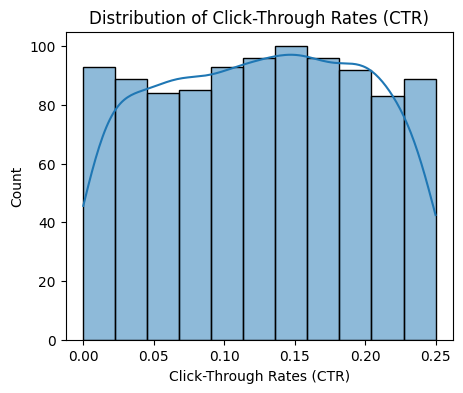

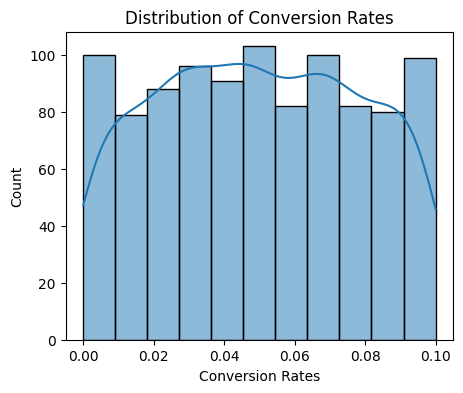

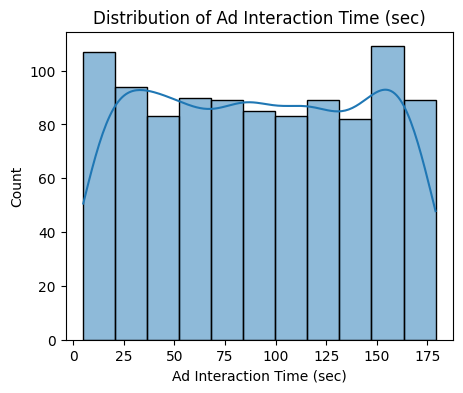

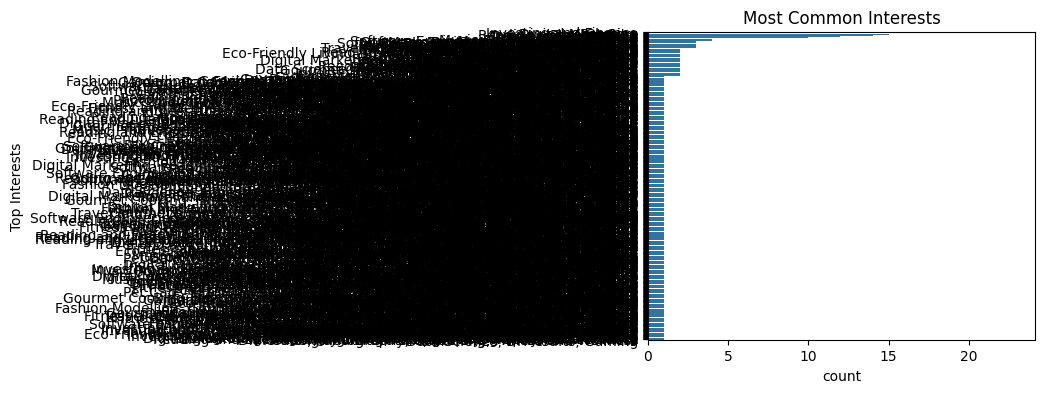

In [6]:
# Q.3: Device usage patterns and online behavior
#device usage
plt.figure(figsize=(5,4))
sns.countplot(x='Device Usage', data=df)
plt.title('Distribution of Device Usage')
plt.show()

#likes and reactions
plt.figure(figsize=(5,4))
sns.histplot(df['Likes and Reactions'], kde=True)
plt.title('Distribution of Likes and Reactions')
plt.show()

# Click-Through Rates (CTR)
plt.figure(figsize=(5,4))
sns.histplot(df['Click-Through Rates (CTR)'], kde=True)
plt.title('Distribution of Click-Through Rates (CTR)')
plt.show()

# Conversion Rates
plt.figure(figsize=(5,4))
sns.histplot(df['Conversion Rates'], kde=True)
plt.title('Distribution of Conversion Rates')
plt.show()

# Ad Interaction Time
plt.figure(figsize=(5,4))
sns.histplot(df['Ad Interaction Time (sec)'], kde=True)
plt.title('Distribution of Ad Interaction Time (sec)')
plt.show()

# Common interests
plt.figure(figsize=(5,4))
sns.countplot(y='Top Interests', data=df, order=df['Top Interests'].value_counts().index)
plt.title('Most Common Interests')
plt.show()


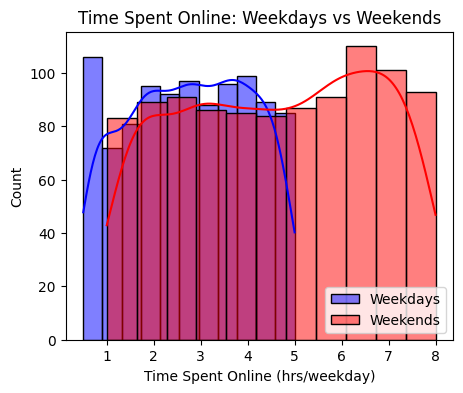

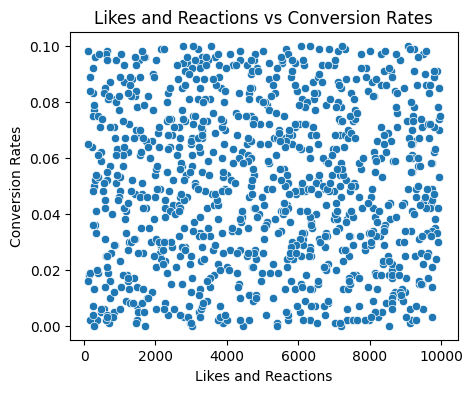

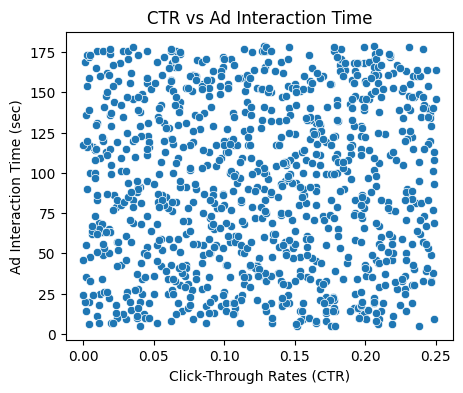

In [8]:
# Q.4: Analyze the average time users spend online on weekdays vs. weekends
# Time spent online on weekdays vs weekends
plt.figure(figsize=(5,4))
sns.histplot(df['Time Spent Online (hrs/weekday)'], kde=True, color='blue', label='Weekdays')
sns.histplot(df['Time Spent Online (hrs/weekend)'], kde=True, color='red', label='Weekends')
plt.title('Time Spent Online: Weekdays vs Weekends')
plt.legend()
plt.show()

# User engagement metrics
plt.figure(figsize=(5,4))
sns.scatterplot(x='Likes and Reactions', y='Conversion Rates', data=df)
plt.title('Likes and Reactions vs Conversion Rates')
plt.show()

# Ad interaction metrics: CTR vs Ad Interaction Time
plt.figure(figsize=(5,4))
sns.scatterplot(x='Click-Through Rates (CTR)', y='Ad Interaction Time (sec)', data=df)
plt.title('CTR vs Ad Interaction Time')
plt.show()

In [9]:
# Q.5: Identify the most common interests among users
common_interests = df['Top Interests'].value_counts()
print(common_interests)

Top Interests
Investing and Finance                                                   23
Gaming                                                                  18
Pet Care                                                                18
Digital Marketing                                                       17
Reading and Literature                                                  17
                                                                        ..
Eco-Friendly Living, Photography, Travel and Adventure                   1
Reading and Literature, Digital Marketing, Photography, Data Science     1
Reading and Literature, Gaming, Fitness and Wellness                     1
DIY Crafts, Photography, Gardening, Fitness and Wellness                 1
Data Science, DIY Crafts, Gaming                                         1
Name: count, Length: 680, dtype: int64


In [26]:
#Question : 06
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('user_profiles_for_ads.csv')
def convert_age(age):
    try:
        if isinstance(age, str):
            if '-' in age:
                start, end = age.split('-')
                return (int(start) + int(end)) / 2
            elif '+' in age:
                return int(age.replace('+', ''))
        return float(age)
    except ValueError:
        return np.nan
df['Age'] = df['Age'].apply(convert_age)
df['Age'].fillna(df['Age'].mean(), inplace=True)
def convert_income(income):
    try:
        if isinstance(income, str):
            if '-' in income:
                start, end = income.replace('k', '000').split('-')
                return (int(start) + int(end)) / 2
            elif '+' in income:
                return int(income.replace('k', '000').replace('+', ''))
        return float(income)
    except ValueError:
        return np.nan

df['Income Level'] = df['Income Level'].apply(convert_income)
df['Income Level'].fillna(df['Income Level'].mean(), inplace=True)
features = df[['Age', 'Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)', 
               'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates', 
               'Ad Interaction Time (sec)', 'Income Level']]
features.fillna(features.mean(), inplace=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters
df.to_csv('user_profiles_for_ads.csv', index=False)
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_8432\889753559.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,29.5,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,30000.0,Digital Marketing,3
1,2,65.0,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,10000.0,Data Science,3
2,3,49.5,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,70000.0,Fitness and Wellness,2
3,4,39.5,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100000.0,"Gaming, DIY Crafts",0
4,5,29.5,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,30000.0,"Fitness and Wellness, Investing and Finance, G...",3


In [28]:
#Question : 07
df = pd.read_csv('user_profiles_for_ads.csv')
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Likes and Reactions': 'mean',
    'Followed Accounts': 'mean',
    'Time Spent Online (hrs/weekday)': 'mean',
    'Time Spent Online (hrs/weekend)': 'mean',
    'Click-Through Rates (CTR)': 'mean',
    'Conversion Rates': 'mean',
    'Ad Interaction Time (sec)': 'mean',
    'Income Level': 'mean'
})

print(cluster_summary)
cluster_summary.to_csv('cluster_summary.csv')


               Age  Likes and Reactions  Followed Accounts  \
Cluster                                                      
0        45.085000          6913.795000         244.285000   
1        48.876404          2782.977528         154.971910   
2        36.529680          2849.063927         249.347032   
3        39.883886          7288.933649         261.781991   
4        30.518229          4984.609375         339.338542   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.590000                         5.110000   
1                               1.967978                         4.006742   
2                               3.741096                         4.476712   
3                               2.514218                         3.631754   
4                               1.767708                         5.831771   

         Click-Through Ra

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

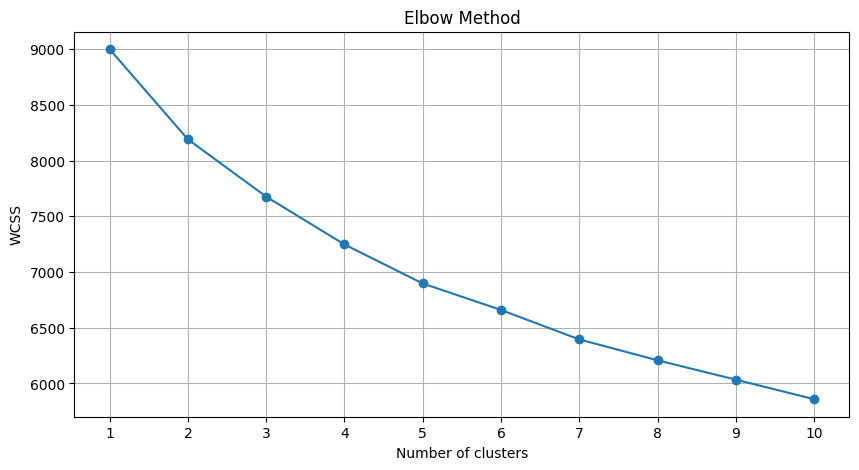

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('user_profiles_for_ads.csv')

# Function to convert age ranges to mean age
def convert_age(age):
    try:
        if isinstance(age, str):
            if '-' in age:
                start, end = age.split('-')
                return (int(start) + int(end)) / 2
            elif '+' in age:
                return int(age.replace('+', ''))
        return float(age)
    except ValueError:
        return np.nan

# Apply the conversion function to the 'Age' column
df['Age'] = df['Age'].apply(convert_age)

# Fill missing values in 'Age' with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Function to convert income ranges to mean income
def convert_income(income):
    try:
        if isinstance(income, str):
            if '-' in income:
                start, end = income.replace('k', '000').split('-')
                return (int(start) + int(end)) / 2
            elif '+' in income:
                return int(income.replace('k', '000').replace('+', ''))
        return float(income)
    except ValueError:
        return np.nan

# Apply the conversion function to the 'Income Level' column
df['Income Level'] = df['Income Level'].apply(convert_income)

# Fill missing values in 'Income Level' with the mean income
df['Income Level'].fillna(df['Income Level'].mean(), inplace=True)

# Select relevant features for clustering
features = df[['Age', 'Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)', 
               'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates', 
               'Ad Interaction Time (sec)', 'Income Level']]

# Handling missing values by filling them with the mean of their respective columns
features = features.fillna(features.mean())

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


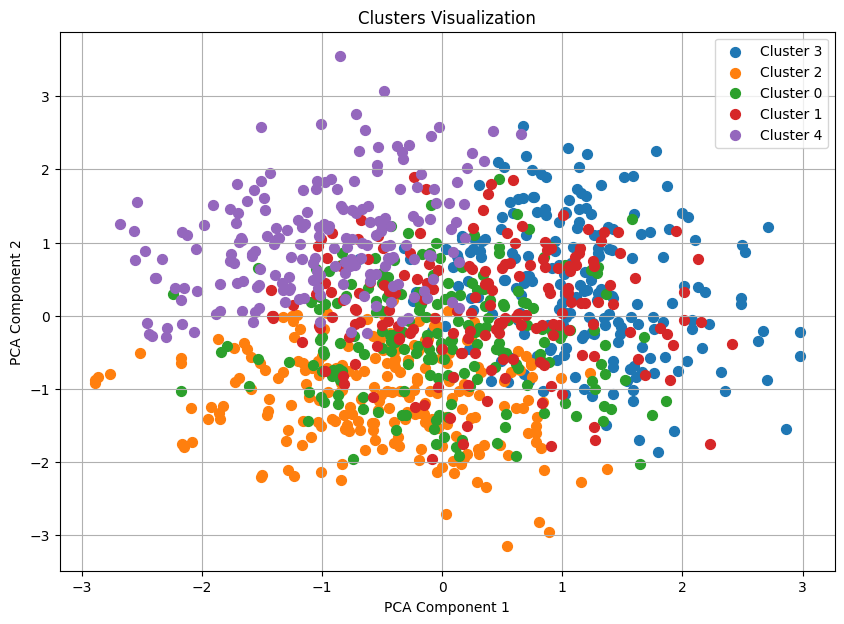

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('user_profiles_for_ads.csv')

# Function to convert age ranges to mean age
def convert_age(age):
    try:
        if isinstance(age, str):
            if '-' in age:
                start, end = age.split('-')
                return (int(start) + int(end)) / 2
            elif '+' in age:
                return int(age.replace('+', ''))
        return float(age)
    except ValueError:
        return np.nan

# Apply the conversion function to the 'Age' column
df['Age'] = df['Age'].apply(convert_age)

# Fill missing values in 'Age' with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Function to convert income ranges to mean income
def convert_income(income):
    try:
        if isinstance(income, str):
            if '-' in income:
                start, end = income.replace('k', '000').split('-')
                return (int(start) + int(end)) / 2
            elif '+' in income:
                return int(income.replace('k', '000').replace('+', ''))
        return float(income)
    except ValueError:
        return np.nan

# Apply the conversion function to the 'Income Level' column
df['Income Level'] = df['Income Level'].apply(convert_income)

# Fill missing values in 'Income Level' with the mean income
df['Income Level'].fillna(df['Income Level'].mean(), inplace=True)

# Select relevant features for clustering
features = df[['Age', 'Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)', 
               'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates', 
               'Ad Interaction Time (sec)', 'Income Level']]

# Handling missing values by filling them with the mean of their respective columns
features = features.fillna(features.mean())

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering with the optimal number of clusters determined previously (let's assume it's 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Reduce the dimensions to 2 using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Create a dataframe with the reduced features and cluster labels
pca_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 7))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50)

plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
#Question: 10 ---> Summary of Tasks Performed
print("1. Preprocessing Data: We handled missing values and converted non-numeric age and income data into numeric formats for clustering purposes.")
print("2. Clustering: Using KMeans, we clustered user profiles based on various features such as age, interactions, and income, assigning each profile to one of five clusters.")
print("3. Cluster Analysis: We calculated the mean values of numerical features for each cluster to summarize the characteristics of each group.")
print("4. Optimal Clusters: The Elbow Method was applied to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for different cluster counts.")
print("5. Cluster Visualization: We visualized the clusters in a 2D plot using PCA, providing a clear graphical representation of the user profile segmentation.")


1. Preprocessing Data: We handled missing values and converted non-numeric age and income data into numeric formats for clustering purposes.
2. Clustering: Using KMeans, we clustered user profiles based on various features such as age, interactions, and income, assigning each profile to one of five clusters.
3. Cluster Analysis: We calculated the mean values of numerical features for each cluster to summarize the characteristics of each group.
4. Optimal Clusters: The Elbow Method was applied to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for different cluster counts.
5. Cluster Visualization: We visualized the clusters in a 2D plot using PCA, providing a clear graphical representation of the user profile segmentation.
